In [ ]:
try:                                     #paper part code 
    import pandas as pd
    import numpy as np
    from sklearn.model_selection import train_test_split
    from sklearn.preprocessing import StandardScaler
    from sklearn.ensemble import RandomForestClassifier, StackingClassifier
    from sklearn.linear_model import LogisticRegression
    from xgboost import XGBClassifier
    from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, confusion_matrix
    import shap
    import matplotlib.pyplot as plt
    import seaborn as sns
except ImportError as e:
    print(f"ImportError: {e}. Please install required libraries: pip install pandas numpy scikit-learn xgboost shap matplotlib seaborn")
    exit(1)

# Load dataset
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']
try:
    data = pd.read_csv(url, names=columns)
except Exception as e:
    print(f"Error loading dataset: {e}. Ensure the URL is correct or download the dataset locally.")
    exit(1)

# Preprocessing
cols_with_zeros = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
data[cols_with_zeros] = data[cols_with_zeros].replace(0, np.nan)
data.fillna(data.median(), inplace=True)

# Features and target
X = data.drop('Outcome', axis=1)
y = data['Outcome']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define base models
estimators = [
    ('rf', RandomForestClassifier(n_estimators=100, random_state=42)),
    ('xgb', XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)),
    ('lr', LogisticRegression(random_state=42))
]

# Stacking ensemble
stacking_model = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression(), cv=5)

# Train and evaluate
stacking_model.fit(X_train_scaled, y_train)
y_pred = stacking_model.predict(X_test_scaled)
print("Ensemble Model Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"Precision: {precision_score(y_test, y_pred):.4f}")
print(f"Recall: {recall_score(y_test, y_pred):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred):.4f}")
print(f"AUC: {roc_auc_score(y_test, stacking_model.predict_proba(X_test_scaled)[:, 1]):.4f}")

# SHAP Analysis
print("Initializing SHAP explainer...")
explainer = shap.KernelExplainer(lambda x: stacking_model.predict_proba(x)[:, 1], X_train_scaled)
shap_values = explainer.shap_values(X_test_scaled)

# Verify shapes
print("X_test shape:", X_test.shape)
print("X_test_scaled shape:", X_test_scaled.shape)
print("shap_values shape:", shap_values.shape)

# SHAP Summary Plot
plt.figure(figsize=(10, 6))
shap.summary_plot(shap_values, X_test, feature_names=X.columns)
plt.savefig('shap_summary.png')
plt.close()

# SHAP Force Plot
plt.figure(figsize=(10, 4))
shap.force_plot(explainer.expected_value, shap_values[0], X_test.iloc[0], feature_names=X.columns, matplotlib=True)
plt.savefig('shap_force.png')
plt.close()

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - ExDiabetesNet')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.savefig('confusion_matrix.png')
plt.show()

# ROC Curve
y_prob_stack = stacking_model.predict_proba(X_test_scaled)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_prob_stack)
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc_score(y_test, y_prob_stack):.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - ExDiabetesNet')
plt.legend()
plt.savefig('roc_curve.png')
plt.show()

# Feature Importance
rf_model = RandomForestClassifier(n_estimators=100, random_state=42).fit(X_train_scaled, y_train)
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42).fit(X_train_scaled, y_train)
plt.figure(figsize=(8, 6))
sns.barplot(x=rf_model.feature_importances_, y=X.columns)
plt.title('Feature Importance - Random Forest')
plt.savefig('rf_feature_importance.png')
plt.show()

plt.figure(figsize=(8, 6))
sns.barplot(x=xgb_model.feature_importances_, y=X.columns)
plt.title('Feature Importance - XGBoost')
plt.savefig('xgb_feature_importance.png')
plt.show()

ImportError: No module named 'sklearn'. Please install required libraries: pip install pandas numpy scikit-learn xgboost shap matplotlib seaborn


NameError: name 'train_test_split' is not defined

c:\Users\shain\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\training.py:183: UserWarning: [17:05:59] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shain\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\training.py:183: UserWarning: [17:05:59] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shain\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\training.py:183: UserWarning: [17:06:00] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
Using 614 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize th

Ensemble Model Performance:
Accuracy: 0.7532
Precision: 0.6545
Recall: 0.6545
F1 Score: 0.6545
AUC: 0.8327
Initializing SHAP explainer...


  0%|          | 0/154 [00:00<?, ?it/s]

X_test shape: (154, 8)
X_test_scaled shape: (154, 8)
shap_values shape: (154, 8)


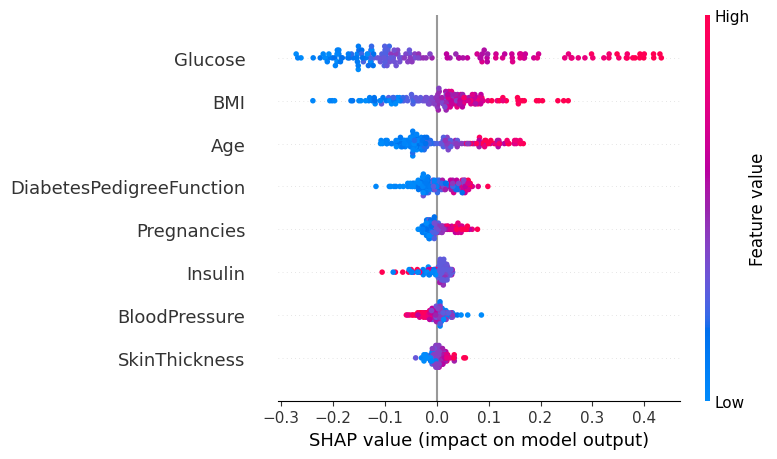

<Figure size 1000x400 with 0 Axes>

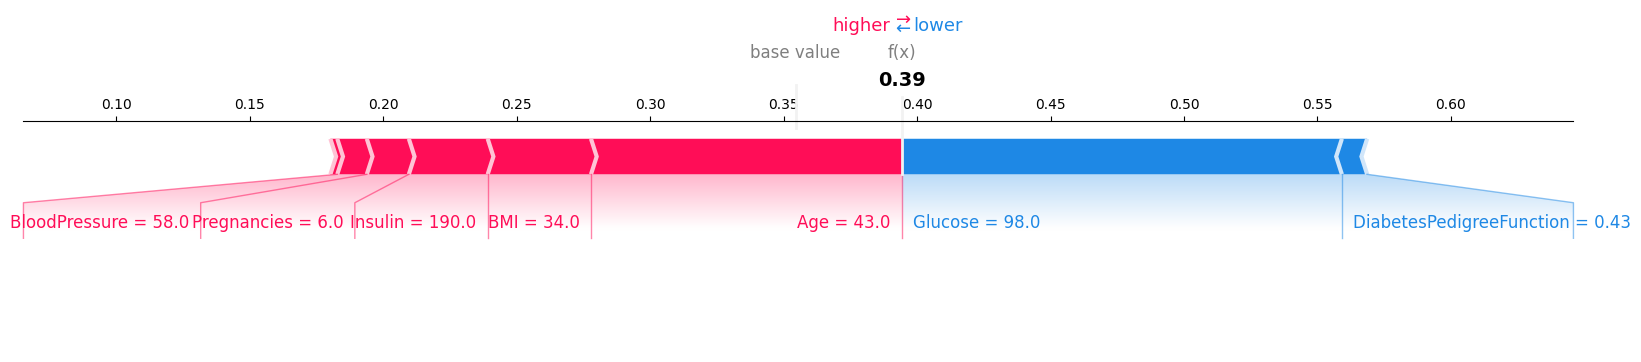

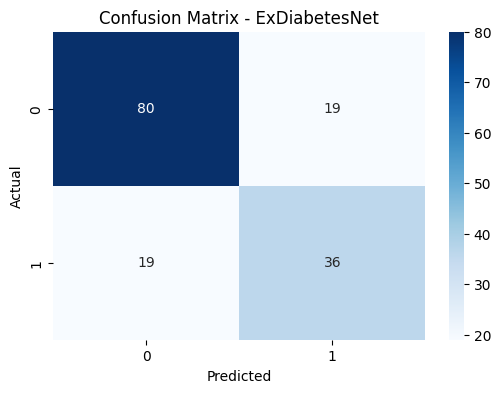

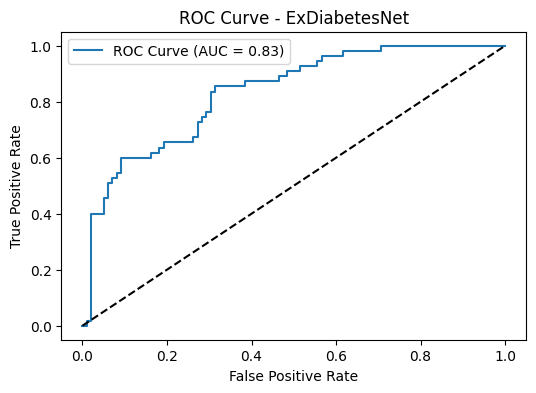

c:\Users\shain\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\training.py:183: UserWarning: [17:08:02] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


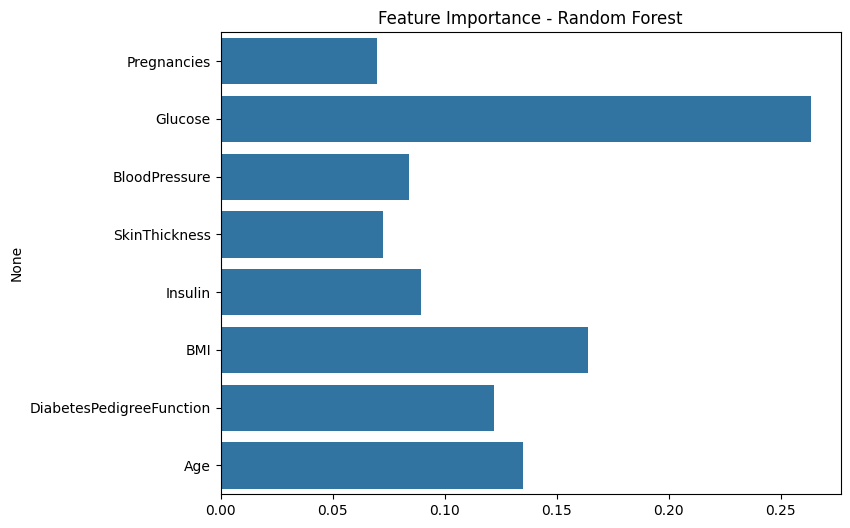

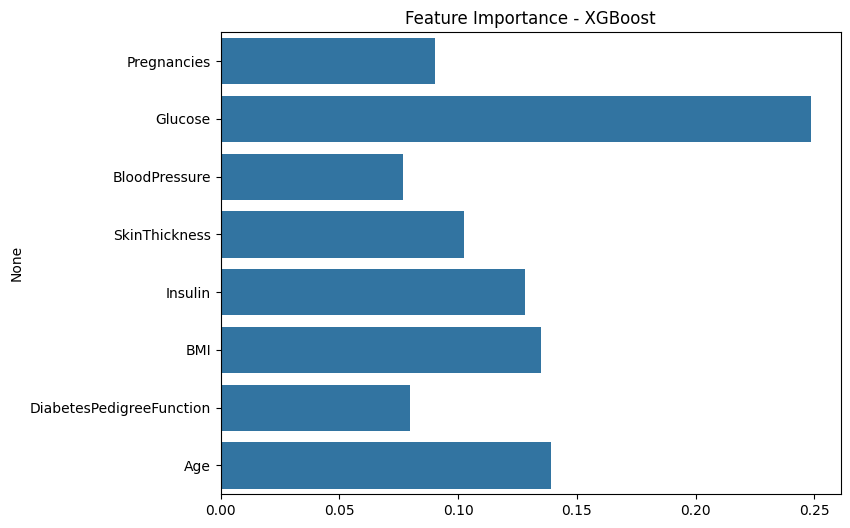

In [1]:
try:
    import pandas as pd
    import numpy as np
    from sklearn.model_selection import train_test_split
    from sklearn.preprocessing import StandardScaler
    from sklearn.ensemble import RandomForestClassifier, StackingClassifier
    from sklearn.linear_model import LogisticRegression
    from xgboost import XGBClassifier
    from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, confusion_matrix
    import shap
    import matplotlib.pyplot as plt
    import seaborn as sns
except ImportError as e:
    print(f"ImportError: {e}. Please install required libraries: pip install pandas numpy scikit-learn xgboost shap matplotlib seaborn")
    exit(1)

# Load dataset
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']
try:
    data = pd.read_csv(url, names=columns)
except Exception as e:
    print(f"Error loading dataset: {e}. Ensure the URL is correct or download the dataset locally.")
    exit(1)

# Preprocessing
cols_with_zeros = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
data[cols_with_zeros] = data[cols_with_zeros].replace(0, np.nan)
data.fillna(data.median(), inplace=True)

# Features and target
X = data.drop('Outcome', axis=1)
y = data['Outcome']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define base models
estimators = [
    ('rf', RandomForestClassifier(n_estimators=100, random_state=42)),
    ('xgb', XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)),
    ('lr', LogisticRegression(random_state=42))
]

# Stacking ensemble
stacking_model = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression(), cv=5)

# Train and evaluate
stacking_model.fit(X_train_scaled, y_train)
y_pred = stacking_model.predict(X_test_scaled)
print("Ensemble Model Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"Precision: {precision_score(y_test, y_pred):.4f}")
print(f"Recall: {recall_score(y_test, y_pred):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred):.4f}")
print(f"AUC: {roc_auc_score(y_test, stacking_model.predict_proba(X_test_scaled)[:, 1]):.4f}")

# SHAP Analysis
print("Initializing SHAP explainer...")
explainer = shap.KernelExplainer(lambda x: stacking_model.predict_proba(x)[:, 1], X_train_scaled)
shap_values = explainer.shap_values(X_test_scaled)

# Verify shapes
print("X_test shape:", X_test.shape)
print("X_test_scaled shape:", X_test_scaled.shape)
print("shap_values shape:", shap_values.shape)

# SHAP Summary Plot
plt.figure(figsize=(10, 6))
shap.summary_plot(shap_values, X_test, feature_names=X.columns)
plt.savefig('shap_summary.png')
plt.close()

# SHAP Force Plot
plt.figure(figsize=(10, 4))
shap.force_plot(explainer.expected_value, shap_values[0], X_test.iloc[0], feature_names=X.columns, matplotlib=True)
plt.savefig('shap_force.png')
plt.close()

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - ExDiabetesNet')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.savefig('confusion_matrix.png')
plt.show()

# ROC Curve
y_prob_stack = stacking_model.predict_proba(X_test_scaled)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_prob_stack)
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc_score(y_test, y_prob_stack):.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - ExDiabetesNet')
plt.legend()
plt.savefig('roc_curve.png')
plt.show()

# Feature Importance
rf_model = RandomForestClassifier(n_estimators=100, random_state=42).fit(X_train_scaled, y_train)
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42).fit(X_train_scaled, y_train)
plt.figure(figsize=(8, 6))
sns.barplot(x=rf_model.feature_importances_, y=X.columns)
plt.title('Feature Importance - Random Forest')
plt.savefig('rf_feature_importance.png')
plt.show()

plt.figure(figsize=(8, 6))
sns.barplot(x=xgb_model.feature_importances_, y=X.columns)
plt.title('Feature Importance - XGBoost')
plt.savefig('xgb_feature_importance.png')
plt.show()

Error setting matplotlib inline: unrecognized arguments: # Enable inline plotting for Jupyter. Falling back to default backend.
Selected Features: ['Glucose', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']


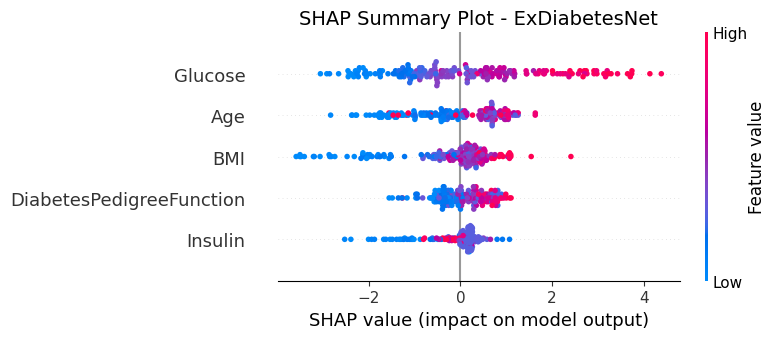

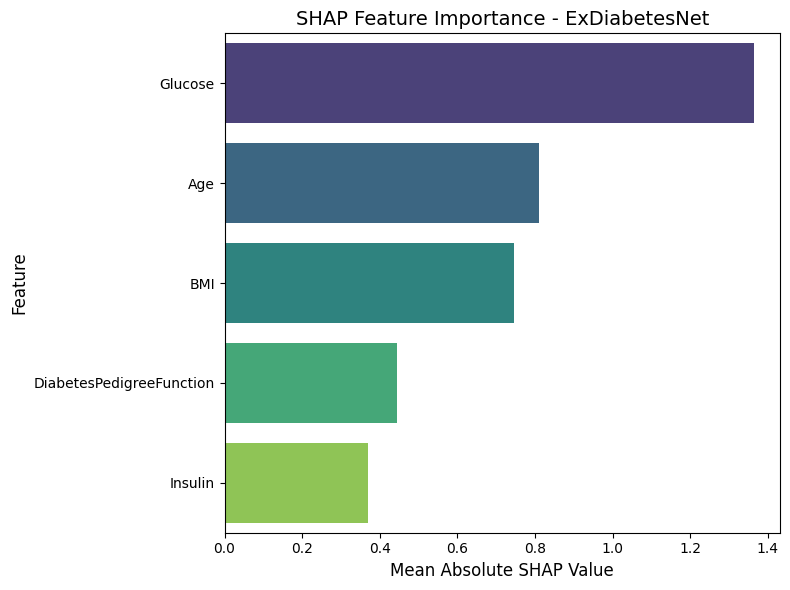

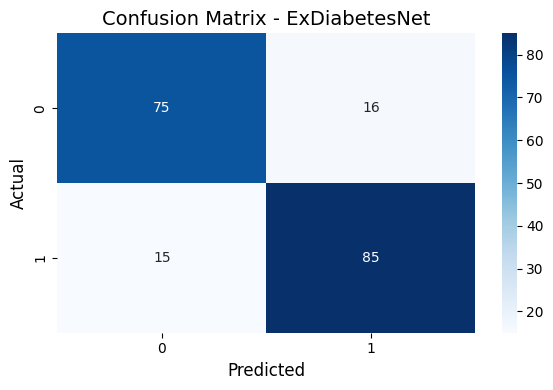

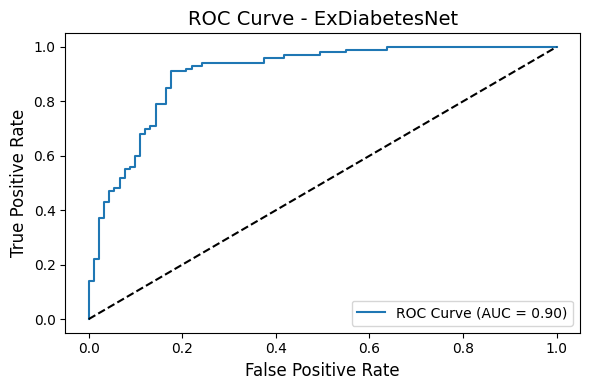


Mean Absolute SHAP Values:
Glucose: 1.3635
Insulin: 0.3704
BMI: 0.7461
DiabetesPedigreeFunction: 0.4449
Age: 0.8113


In [10]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import roc_curve, confusion_matrix, roc_auc_score
from sklearn.feature_selection import RFE
from imblearn.combine import SMOTETomek
import shap
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import sys
import os

# Suppress warnings for cleaner output
warnings.filterwarnings('ignore')

# Detect if running in Jupyter Notebook
def is_jupyter():
    try:
        from IPython import get_ipython
        return get_ipython() is not None and 'IPKernelApp' in get_ipython().config
    except Exception:
        return False

# Configure matplotlib backend
if is_jupyter():
    try:
        %matplotlib inline  # Enable inline plotting for Jupyter
        print("Running in Jupyter Notebook: Inline plotting enabled.")
    except Exception as e:
        print(f"Error setting matplotlib inline: {e}. Falling back to default backend.")
else:
    # For non-Jupyter environments, use a default interactive backend (e.g., TkAgg)
    try:
        plt.switch_backend('TkAgg')  # Use TkAgg for pop-up windows in IDEs
        print("Running in non-Jupyter environment: Using TkAgg backend for pop-up plots.")
    except Exception as e:
        print(f"Error setting TkAgg backend: {e}. Switching to non-interactive Agg backend.")
        plt.switch_backend('Agg')  # Non-interactive backend for saving plots only

# Load dataset
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']
try:
    data = pd.read_csv(url, names=columns)
except Exception as e:
    print(f"Error loading dataset: {e}. Download from https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database and save as 'diabetes.csv'.")
    if os.path.exists('diabetes.csv'):
        data = pd.read_csv('diabetes.csv', names=columns)
    else:
        print("Dataset not found. Exiting.")
        sys.exit(1)

# Preprocessing
cols_with_zeros = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
data[cols_with_zeros] = data[cols_with_zeros].replace(0, np.nan)
data.fillna(data.median(), inplace=True)

# Balanced dataset with SMOTETomek
try:
    smote_tomek = SMOTETomek(random_state=42)
    X_balanced, y_balanced = smote_tomek.fit_resample(data.drop('Outcome', axis=1), data['Outcome'])
except Exception as e:
    print(f"Error applying SMOTETomek: {e}. Ensure imbalanced-learn is installed: pip install imbalanced-learn")
    sys.exit(1)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_balanced, y_balanced, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=columns[:-1])
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=columns[:-1])

# Feature selection with RFE
rf_for_rfe = RandomForestClassifier(n_estimators=100, random_state=42)
rfe = RFE(estimator=rf_for_rfe, n_features_to_select=5)
X_train_selected = rfe.fit_transform(X_train_scaled, y_train)
X_test_selected = rfe.transform(X_test_scaled)
selected_features = [columns[i] for i in range(len(columns)-1) if rfe.support_[i]]
print("Selected Features:", selected_features)

# Train ExDiabetesNet (stacking ensemble)
estimators = [
    ('rf', RandomForestClassifier(n_estimators=400, random_state=42)),
    ('xgb', XGBClassifier(learning_rate=0.1, max_depth=6, eval_metric='logloss', random_state=42)),
    ('lr', LogisticRegression(max_iter=150, random_state=42))
]
stacking_model = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression(max_iter=150), cv=5)
try:
    stacking_model.fit(X_train_selected, y_train)
    y_pred_stack = stacking_model.predict(X_test_selected)
    y_prob_stack = stacking_model.predict_proba(X_test_selected)[:, 1]
except Exception as e:
    print(f"Error training ExDiabetesNet: {e}. Exiting.")
    sys.exit(1)

# Train XGBoost for SHAP analysis
xgb_model = XGBClassifier(learning_rate=0.1, max_depth=6, eval_metric='logloss', random_state=42)
try:
    xgb_model.fit(X_train_selected, y_train)
except Exception as e:
    print(f"Error training XGBoost for SHAP: {e}. Exiting.")
    sys.exit(1)

# Graph 1: SHAP Summary Plot
try:
    explainer = shap.TreeExplainer(xgb_model)
    shap_values = explainer.shap_values(X_test_selected)
    plt.figure(figsize=(10, 6))
    shap.summary_plot(shap_values, X_test_scaled_df[selected_features], feature_names=selected_features, show=False)
    plt.title('SHAP Summary Plot - ExDiabetesNet', fontsize=14)
    plt.tight_layout()
    plt.savefig('shap_summary_plot.png', dpi=300, bbox_inches='tight')
    plt.show()  # Display inline or in pop-up window
    plt.close()
except Exception as e:
    print(f"Error generating SHAP Summary Plot: {e}")

# Graph 2: SHAP Bar Plot
try:
    plt.figure(figsize=(8, 6))
    shap_importance = np.abs(shap_values).mean(axis=0)
    shap_df = pd.DataFrame({'Feature': selected_features, 'SHAP Importance': shap_importance})
    shap_df = shap_df.sort_values(by='SHAP Importance', ascending=False)
    sns.barplot(x='SHAP Importance', y='Feature', data=shap_df, palette='viridis')
    plt.title('SHAP Feature Importance - ExDiabetesNet', fontsize=14)
    plt.xlabel('Mean Absolute SHAP Value', fontsize=12)
    plt.ylabel('Feature', fontsize=12)
    plt.tight_layout()
    plt.savefig('shap_bar_plot.png', dpi=300, bbox_inches='tight')
    plt.show()  # Display inline or in pop-up window
    plt.close()
except Exception as e:
    print(f"Error generating SHAP Bar Plot: {e}")

# Graph 3: Confusion Matrix
try:
    cm = confusion_matrix(y_test, y_pred_stack)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title('Confusion Matrix - ExDiabetesNet', fontsize=14)
    plt.xlabel('Predicted', fontsize=12)
    plt.ylabel('Actual', fontsize=12)
    plt.tight_layout()
    plt.savefig('confusion_matrix.png', dpi=300, bbox_inches='tight')
    plt.show()  # Display inline or in pop-up window
    plt.close()
except Exception as e:
    print(f"Error generating Confusion Matrix: {e}")

# Graph 4: ROC Curve
try:
    fpr, tpr, _ = roc_curve(y_test, y_prob_stack)
    plt.figure(figsize=(6, 4))
    plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc_score(y_test, y_prob_stack):.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate', fontsize=12)
    plt.ylabel('True Positive Rate', fontsize=12)
    plt.title('ROC Curve - ExDiabetesNet', fontsize=14)
    plt.legend(fontsize=10)
    plt.tight_layout()
    plt.savefig('roc_curve.png', dpi=300, bbox_inches='tight')
    plt.show()  # Display inline or in pop-up window
    plt.close()
except Exception as e:
    print(f"Error generating ROC Curve: {e}")

# Print SHAP Values for reference
print("\nMean Absolute SHAP Values:")
try:
    for feature, importance in zip(selected_features, shap_importance):
        print(f"{feature}: {importance:.4f}")
except Exception as e:
    print(f"Error printing SHAP values: {e}")